In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
path = Path("D:\level 3\material\myProject\crop_part1")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))


In [3]:
print("length of file : " ,len(filenames))
print("First 3 files : " , filenames[:3])

length of file :  9780
First 3 files :  ['100_1_0_20170110183726390.jpg.chip.jpg', '100_1_2_20170105174847679.jpg.chip.jpg', '101_1_2_20170105174739309.jpg.chip.jpg']


In [4]:

np.random.seed(10)
np.random.shuffle(filenames)



In [5]:
age_labels, image_path = [] , []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    #---------------------


C:\Users\Youss\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

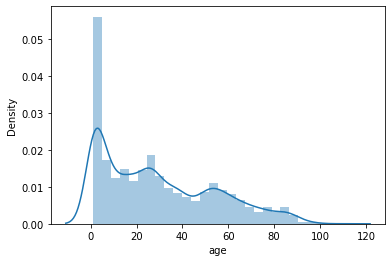

In [6]:
df = pd.DataFrame()
df['image'], df['age'] = image_path, age_labels  
#ages plot
sns.distplot(df.age)

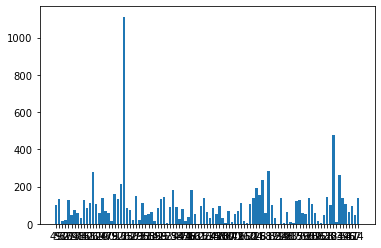

Max value: 99


In [7]:
x_ages = list(set(age_labels))
y_ages = [age_labels.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(age_labels))  

In [8]:
age_labels=np.array(age_labels)

In [9]:
# Age classification to 10 classes
classes_of_ages = []
for i in age_labels:
    i = int(i)
    if i <= 10:
        classes_of_ages.append("0")
    if (i>10) and (i<=20):
        classes_of_ages.append("1")
    if (i>20) and (i<=30):
        classes_of_ages.append("2")
    if (i>30) and (i<=40):
        classes_of_ages.append("3")
    if (i>40) and (i<=50):
        classes_of_ages.append("4")
    if (i>50) and (i<=60):
        classes_of_ages.append("5")
    if (i>60) and (i<=70):
        classes_of_ages.append("6")
    if (i>70) and (i<=80):
        classes_of_ages.append("7")
    if (i>80) and (i<=90):
        classes_of_ages.append("8")
    if (i>90) :
        classes_of_ages.append("9")
        

In [10]:
#age dictionary
age_dic={ "0":'under 10',"1":'under 20' ,"2":'under 30' ,"3":'under40' ,"4":'under 50' ,"5":'under60' ,"6":'under 70' ,"7":'under 80' ,"8":'under 90' ,"9":'grater than 90' }
age_dic["0"]

'under 10'

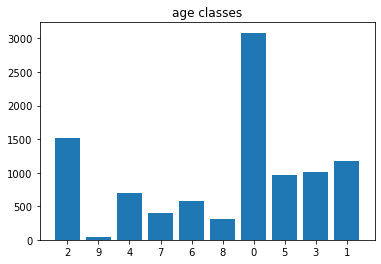

In [11]:
#age_classes plot  
import matplotlib.pyplot as plt
x_ages = list(set(classes_of_ages))
y_ages = [classes_of_ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.title("age classes")
plt.show()

      

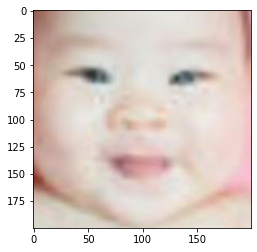

In [12]:
# showing the image wit index 15426
img = Image.open("D:\level 3\material\myProject\crop_part1/"+df.image[154])
plt.imshow(img)



In [13]:
def convert_age(i): 
        if i <= 10:
            return 0
        if (i>10) and (i<=20):
            return 1
        if (i>20) and (i<=30):
            return 2
        if (i>30) and (i<=40):
            return 3
        if (i>40) and (i<=50):
            return 4
        if (i>50) and (i<=60):
             return 5
        if (i>60) and (i<=70):
             return 6
        if (i>70) and (i<=80):
             return 7
        if (i>80) and (i<=90):
             return 8
        if (i>90) :
             return 9

C:\Users\Youss\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


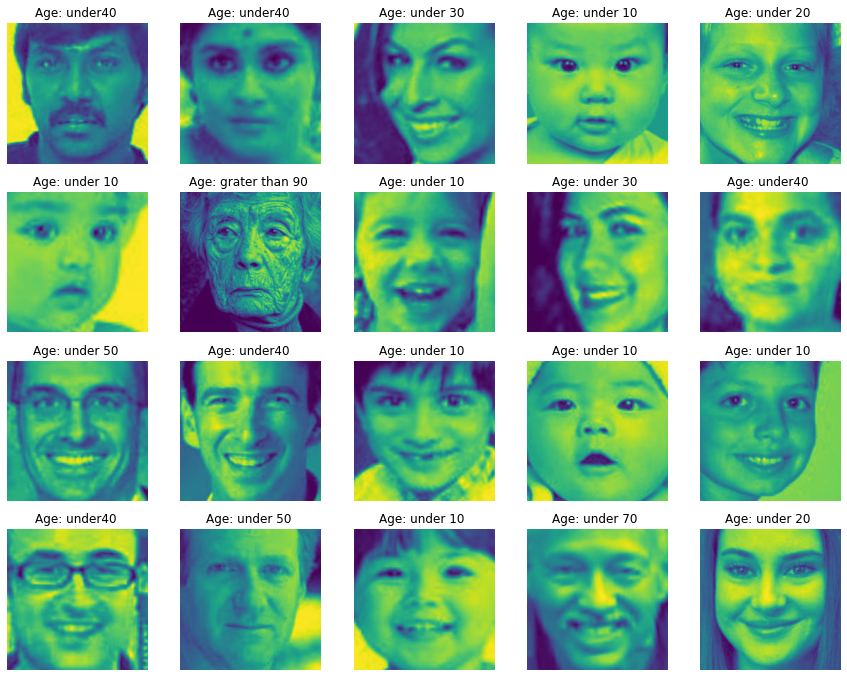

In [14]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file ,classes in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("D:\level 3\material\myProject\crop_part1/"+file,grayscale='True')
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age_dic[str(convert_age(int(classes)))]} ")
    plt.axis('off')
    

In [15]:
classes_of_ages[:12]

['3', '3', '2', '0', '1', '0', '9', '0', '2', '3', '4', '3']

In [16]:
#splitting data
train, test = train_test_split(df, train_size=0.75, random_state=0)

test.head(6)

,image,age
3460,67_1_3_20170109151006621.jpg.chip.jpg,67
5359,65_0_2_20161219193311243.jpg.chip.jpg,65
6067,18_1_3_20170104221905278.jpg.chip.jpg,18
7105,7_0_0_20170110225109143.jpg.chip.jpg,7
8678,80_0_0_20170111211700924.jpg.chip.jpg,80
8409,16_0_0_20170110232315216.jpg.chip.jpg,16


In [17]:

x_train = []

for file in train.image:
    img = load_img("D:\level 3\material\myProject\crop_part1/"+file,grayscale='True')
    img = img.resize((64,64), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)
x_train = x_train.reshape(len(x_train),64,64,1)
x_train.shape



C:\Users\Youss\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


(7335, 64, 64, 1)

In [18]:
x_test = []
for file in test.image:
    img = load_img("D:\level 3\material\myProject\crop_part1/"+file,grayscale='True')
    img = img.resize((64,64), Image.ANTIALIAS)
    img = np.array(img)
    x_test.append(img)

x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test), 64,64,1)



In [19]:
#converting dataset into 2D array
d2_train_dataset = x_train.reshape((len(x_train),64*64,1))
d2_train_dataset = d2_train_dataset.reshape((len(x_train),64*64*1))
d2_train_dataset =np.array(d2_train_dataset)


d2_test_dataset = x_test.reshape((len(x_test),64*64,1))
d2_test_dataset = d2_test_dataset.reshape((len(x_test),64*64*1))
d2_test_dataset=np.array(d2_test_dataset)

In [20]:
y_age_train = []
for file in train.age:
    Ages = file
    y_age_train.append(convert_age(int(Ages)))

y_age_train=np.array(y_age_train)



y_age_test = []
for file in test.age:
    Ages = file
    y_age_test.append(convert_age(int(Ages)))

y_age_test=np.array(y_age_test)


In [21]:
# training model SVM

model = SVC(C=1 , kernel='linear',gamma='auto') 

model.fit(d2_train_dataset,y_age_train)

y2 = model.predict(d2_test_dataset)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy on test data set data is",accuracy_score(y_age_test,y2))

Accuracy on test data set data is 0.49366053169734153


<AxesSubplot:>

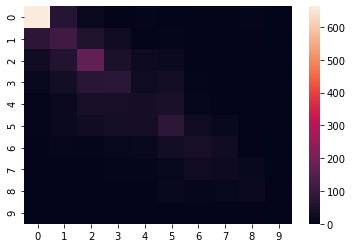

In [23]:
#confusion matrics

cm = confusion_matrix(y_age_test,y2)
cm
sns.heatmap(cm)


In [25]:
y2.shape

(2445,)

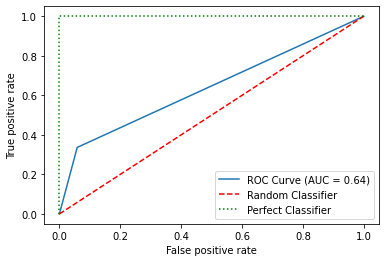

In [32]:
#Roc curve  


from sklearn.metrics import roc_curve,auc
fpr_sum = np.zeros(3)
tpr_sum = np.zeros(3)
for class_num in range(10):
  predications = []
  true_labels = []
  for i in range(2445):
    if(y2[i] == class_num):
      predications.append(1)
    else:
      predications.append(0)

    if(y_age_test[i] == class_num):
      true_labels.append(1)
    else:
      true_labels.append(0)

  predications = np.array(predications)
  true_labels = np.array(true_labels)
  fpr,tpr,_ = roc_curve(true_labels,predications)
  fpr_sum += fpr
  tpr_sum += tpr

fpr = fpr_sum / 10
tpr = tpr_sum / 10

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()